In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

<h2>Iris Classification Dataset</h2>
<h3>Target Class contains string. It needs to be encoded to numeric values as XGBoost requires all numeric values</h3>
<h4>Hands-on: Classification with AWS Machine Learning Service</h4>
Input Features: sepal_length,sepal_width,petal_length,petal_width<br>
Target Feature: encoded_class<br>
Objective: Predict encoded_class for a given sepal_length,sepal_width,petal_length,petal_width<br>
<h4>Data source: https://archive.ics.uci.edu/ml/datasets/iris</h4>

In [21]:
columns = ['encoded_class','sepal_length','sepal_width','petal_length','petal_width']

In [2]:
# Encode Class Labels to integers
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

LabelEncoder()

In [3]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [4]:
df = pd.read_csv('iris_all.csv')

In [ ]:
df['class'].value_counts()

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

In [6]:
le.transform(df['class'])[-5:]

array([2, 2, 2, 2, 2])

In [7]:
# Convert Classes to numeric value
df['encoded_class'] = le.transform(df['class'])

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,encoded_class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
df.tail()

In [9]:
# Visualize
setosa = df['class'] == 'Iris-setosa'
versicolor = df['class'] == 'Iris-versicolor'
virginica = df['class'] == 'Iris-virginica'

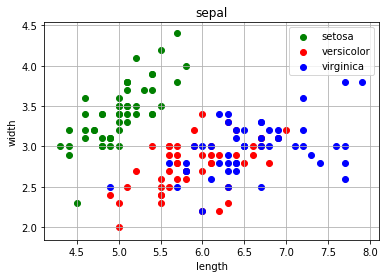

In [11]:
plt.scatter(df[setosa].sepal_length,y=df[setosa].sepal_width, label='setosa',color='g')
plt.scatter(df[versicolor].sepal_length,y=df[versicolor].sepal_width, label='versicolor',color='r')
plt.scatter(df[virginica].sepal_length,y=df[virginica].sepal_width, label='virginica',color='b')
plt.xlabel('length')
plt.ylabel('width')
plt.title('sepal')
plt.grid(True)
plt.legend()

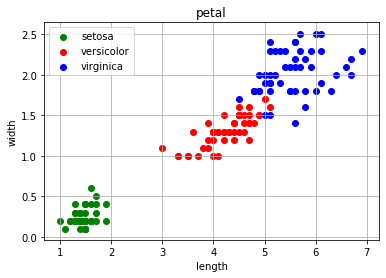

In [10]:
plt.scatter(df[setosa].petal_length,y=df[setosa].petal_width, label='setosa',color='g')
plt.scatter(df[versicolor].petal_length,y=df[versicolor].petal_width, label='versicolor',color='r')
plt.scatter(df[virginica].petal_length,y=df[virginica].petal_width, label='virginica',color='b')
plt.xlabel('length')
plt.ylabel('width')
plt.title('petal')
plt.grid(True)
plt.legend()

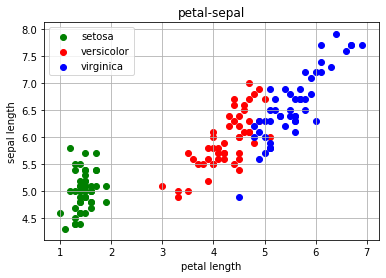

In [12]:
plt.scatter(df[setosa].petal_length,y=df[setosa].sepal_length, label='setosa',color='g')
plt.scatter(df[versicolor].petal_length,y=df[versicolor].sepal_length, label='versicolor',color='r')
plt.scatter(df[virginica].petal_length,y=df[virginica].sepal_length, label='virginica',color='b')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.title('petal-sepal')
plt.grid(True)
plt.legend()

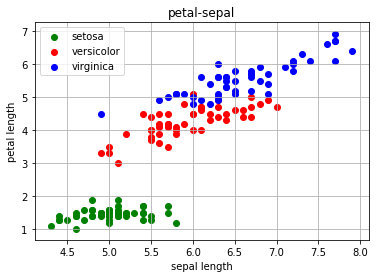

In [13]:
plt.scatter(df[setosa].sepal_length,y=df[setosa].petal_length, label='setosa',color='g')
plt.scatter(df[versicolor].sepal_length,y=df[versicolor].petal_length, label='versicolor',color='r')
plt.scatter(df[virginica].sepal_length,y=df[virginica].petal_length, label='virginica',color='b')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('petal-sepal')
plt.grid(True)
plt.legend()

## Training and Validation Set
### Target Variable as first column followed by input features:
class,sepal_length,sepal_width,petal_length,petal_width
### Training, Validation files do not have a column header

In [18]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [19]:
rows = df.shape[0]
train = int(.7 * rows)
test = int(.3 * rows)

In [16]:
rows, train, test

(150, 105, 45)

In [22]:
# Write Training Set
df[:train].to_csv('iris_train.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [23]:
# Write Validation Set
df[train:].to_csv('iris_validation.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [25]:
# Write Column List
with open('iris_train_column_list.txt','w') as f:
    f.write(','.join(columns))